https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kurmukovai/ds-for-business/88ded3b36c5cc97c26756b4c62c98bbbf99deba3/2022/seminar-5/CC%20GENERAL.csv')
df.dropna(inplace=True)
df.head(3)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0  C10001    40.900749           0.818182      95.40              0.00  \
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                    95.4      0.000000             0.166667  \
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                         0.0                          0.083333  \
1                         0.0                          0.000000   
2                         1.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
0                    0.00                 0              2        1000.0  \
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12

# Credit Card dataset

- CUST_ID - Identification of Credit Card holder (Categorical)
- BALANCE - Balance amount left in their account to make purchases
- BALANCE_FREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES - Amount of purchases made from account
- ONEOFF_PURCHASES - Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES - Amount of purchase done in installment
- CASH_ADVANCE - Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY - How frequently the cash in advance being paid
- CASH_ADVANCE_TRX - Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX - Numbe of purchase transactions made
- CREDIT_LIMIT - Limit of Credit Card for user
- PAYMENTS - Amount of Payment done by user
- MINIMUM_PAYMENTS - Minimum amount of payments made by user
- PRC_FULL_PAYMENT - Percent of full payment paid by user
- TENURE - Tenure of credit card service for user

# Make customer_id to be an index

In [3]:
df.CUST_ID.nunique(), df.shape

(8636, (8636, 18))

In [4]:
df.index = df['CUST_ID']
df = df.drop('CUST_ID', axis=1)
df.head(3)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00  \
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667  \
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
CUST_ID                                                                 
C10001                          0.0                          0.083333  \
C10002                          0.0                          0.000000   
C10003                          1.0                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX   
CUST_ID                                                            
C10001                     0.00                 0              2  \
C10002                     0.25                 4              0   
C10003                     0.00                 0             12   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12

# Start with basic EDA

In [5]:
df.head(3)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00  \
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667  \
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
CUST_ID                                                                 
C10001                          0.0                          0.083333  \
C10002                          0.0                          0.000000   
C10003                          1.0                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX   
CUST_ID                                                            
C10001                     0.00                 0              2  \
C10002                     0.25                 4              0   
C10003                     0.00                 0             12   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12

# 1. Plot features distribution

- Plot a 3 by 6 plot with each subplot representing a  histogramm of features' distribution (e.g. using `plt.subplots(...)`). 
- Add title for each subplot, and format its fontsize.
- Remove last (empty) subplot or make it invisible

save the resulting graph to pdf and upload to the reporting form.

In [6]:
import matplotlib.pyplot as plt

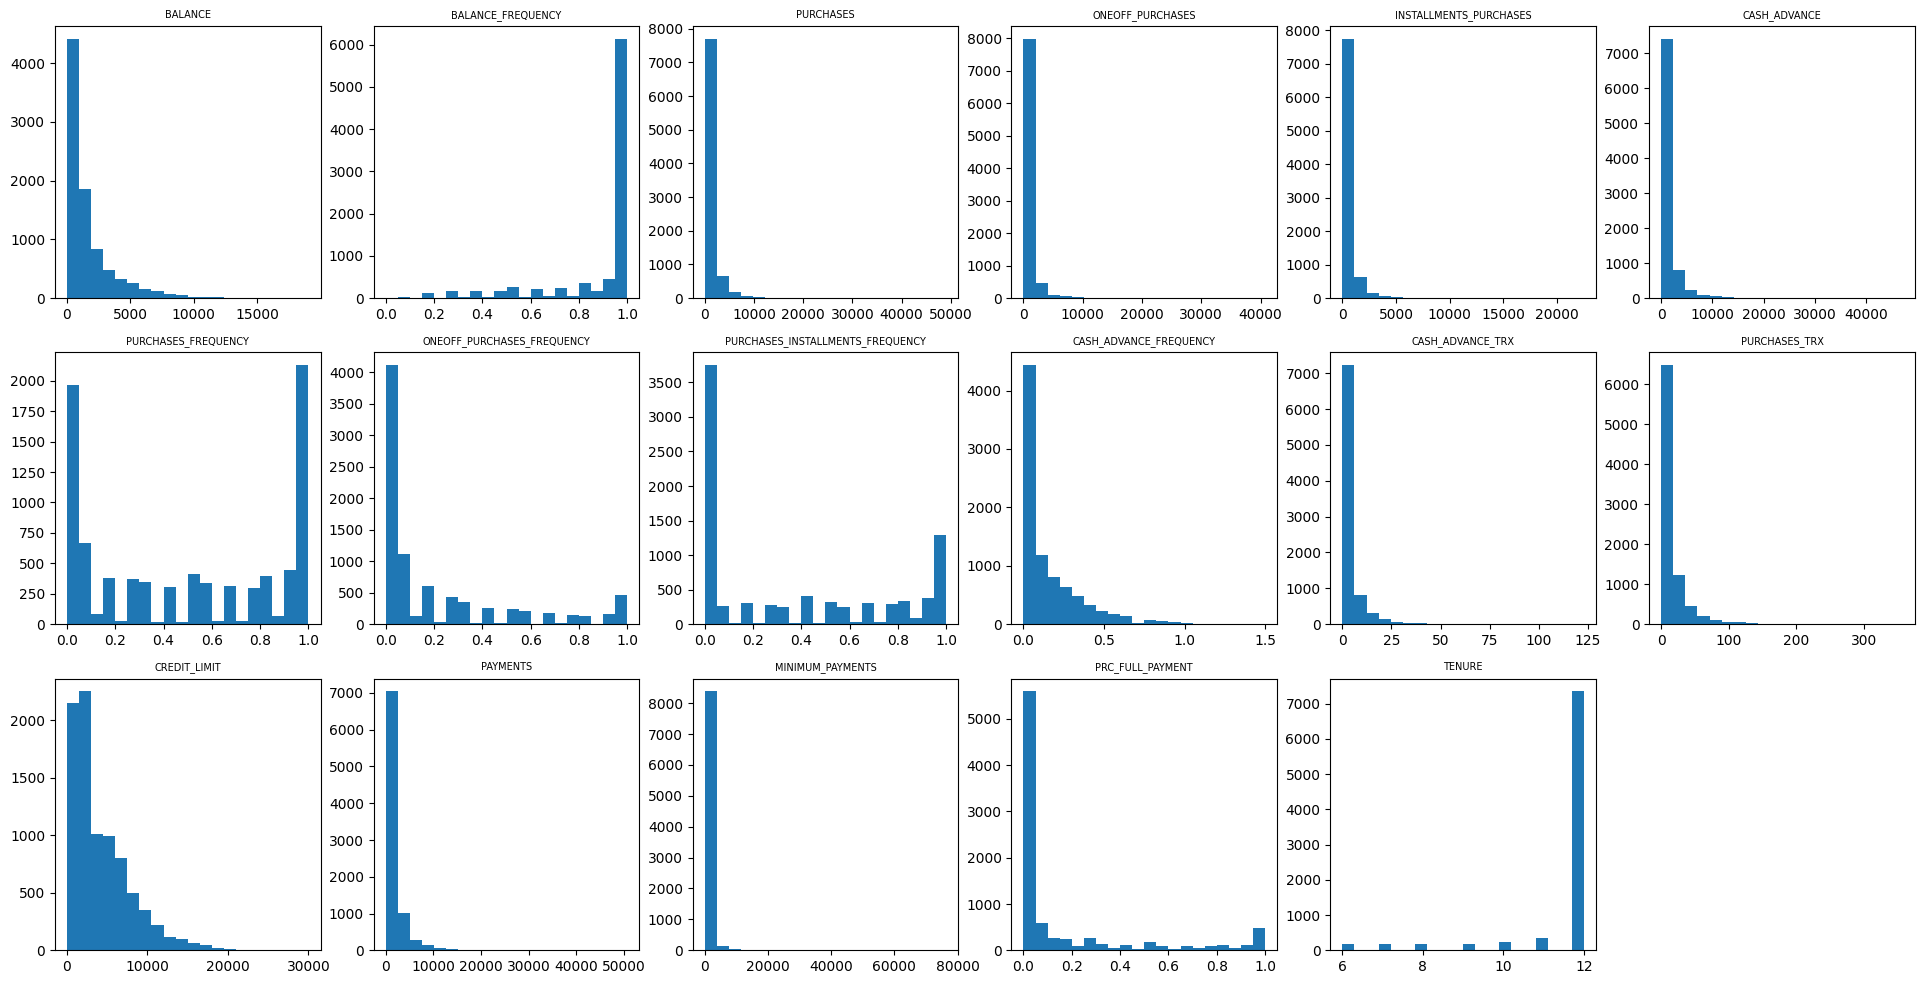

In [7]:
fig, axs = plt.subplots(3, 6, figsize=(24, 12))
columns = df.columns

for ax, col in zip(axs.flatten(), columns):
    ax.hist(df[col], bins=20)
    ax.set_title(col, fontsize=7)
axs.flatten()[-1].set_visible(False)

# 2. Preprocess features

All clustering algorithms requires some kind of feature standartization.
We will use standartization (or "z-scoring"):

$$X_{std} = \frac{X - mean(X)}{std(X)}$$

What is the mean of all columns in `X_std`? What is the standard deviation of all columns in `X_std`?

- 0, 1
- 1, 0
- 1, 1
- 0, 0

## Scientific notation

Recall that sometimes Python uses a so-called scientific notation for small numbers, e.g. notation `6.993531e-17` by definition is: 

$$6.993531 \cdot 10^{-17} = \frac{6.993531}{10^{17}} = 0.00000000000000006993531$$.

For more details, see https://sparrow.dev/python-scientific-notation/ .

For the purposes of this home assignment all numbers with absolute value smaller than $0.000001$ are effectively $0$.

In [8]:
X_standardized = (df - df.mean(axis=0)) / df.std(axis=0)

In [9]:
X_standardized.std()

BALANCE                             1.0
BALANCE_FREQUENCY                   1.0
PURCHASES                           1.0
ONEOFF_PURCHASES                    1.0
INSTALLMENTS_PURCHASES              1.0
CASH_ADVANCE                        1.0
PURCHASES_FREQUENCY                 1.0
ONEOFF_PURCHASES_FREQUENCY          1.0
PURCHASES_INSTALLMENTS_FREQUENCY    1.0
CASH_ADVANCE_FREQUENCY              1.0
CASH_ADVANCE_TRX                    1.0
PURCHASES_TRX                       1.0
CREDIT_LIMIT                        1.0
PAYMENTS                            1.0
MINIMUM_PAYMENTS                    1.0
PRC_FULL_PAYMENT                    1.0
TENURE                              1.0
dtype: float64

In [10]:
X_standardized.mean()

BALANCE                            -6.582147e-18
BALANCE_FREQUENCY                  -4.015109e-16
PURCHASES                           8.227683e-18
ONEOFF_PURCHASES                   -5.430271e-17
INSTALLMENTS_PURCHASES             -3.373350e-17
CASH_ADVANCE                       -3.291073e-17
PURCHASES_FREQUENCY                 4.031565e-17
ONEOFF_PURCHASES_FREQUENCY         -9.873220e-18
PURCHASES_INSTALLMENTS_FREQUENCY   -3.620181e-17
CASH_ADVANCE_FREQUENCY              3.373350e-17
CASH_ADVANCE_TRX                    9.873220e-18
PURCHASES_TRX                      -8.227683e-18
CREDIT_LIMIT                        7.898576e-17
PAYMENTS                           -1.645537e-17
MINIMUM_PAYMENTS                   -3.620181e-17
PRC_FULL_PAYMENT                   -3.291073e-18
TENURE                              1.053143e-16
dtype: float64

# 3. KMeans

What does K in KMeans means?

- "K" represents the keyword arguments **kwargs.
- "K" is the minimal number of clusters to look for in the data.
- **"K" stands for the number of clusters to look for in the data.**
- "K" is number of trees used to compute the means.

# Run KMeans with 5 clusters

In [11]:
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [12]:
kmeans = KMeans(n_clusters=5, n_init=20)
labels = kmeans.fit_predict(X_standardized)

In [13]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([  83, 3765, 2334, 1106, 1348]))

# 4. Run Kmeans with different number of clusters


Which number of clusters is optimal according to silhouette score?

- 4
- 8
- **12**
- 20


From https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

> The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [14]:
def run_kmeans(x, kmin=2, kmax=20):
    inertia = []
    for k in tqdm(range(kmin, kmax+1)):
        kmeans = KMeans(n_clusters=k, n_init='auto')
        kmeans.fit(x)
        results_df[f'clusters_kmeans_{k}'] = kmeans.predict(x)
        inertia.append(kmeans.inertia_)
    return inertia

In [15]:
results_df = pd.DataFrame()
kmin, kmax = 2, 20
n_clusters = range(kmin, kmax+1)

# standardized
inertia = run_kmeans(X_standardized, kmin, kmax)

100%|██████████████████████| 19/19 [00:02<00:00,  6.83it/s]


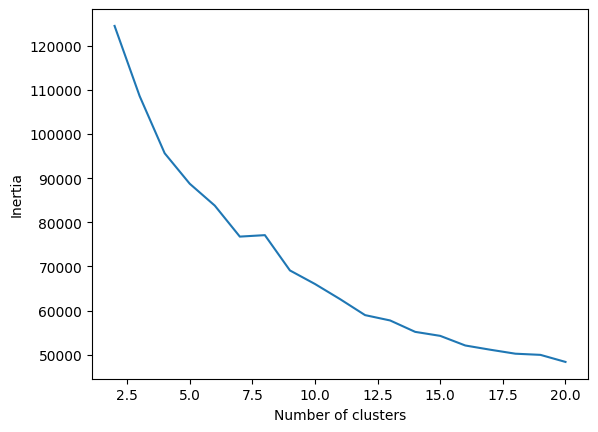

In [16]:
plt.plot(n_clusters, inertia);
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');

In [17]:
from plot_utils import plot_silhouette
# if you run in google colab copy-paste code from `plot_utils.py` into a notebook cell

For n_clusters = 4 The average silhouette_score is : 0.1970633476945604
For n_clusters = 8 The average silhouette_score is : 0.18922663813914828
For n_clusters = 12 The average silhouette_score is : 0.21771895705090313
For n_clusters = 16 The average silhouette_score is : 0.19986413231372696
For n_clusters = 20 The average silhouette_score is : 0.2037068163716693


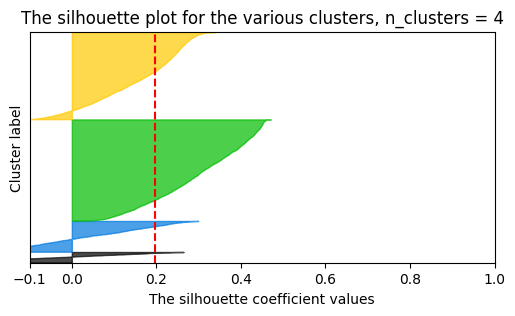

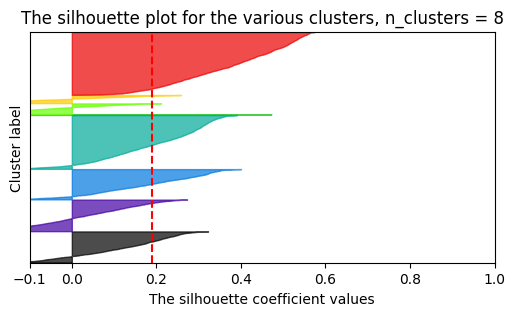

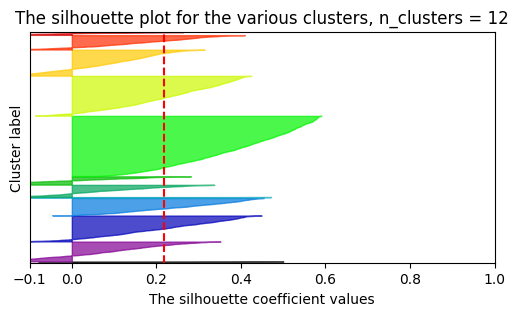

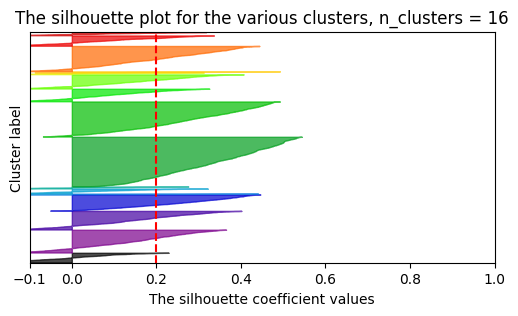

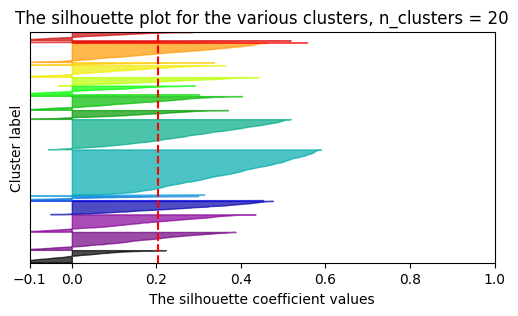

In [18]:
plot_silhouette(X_standardized, kmin=4, kmax=21, step=4)

# 5. Hierarchical clustering

What is hieararchical clustering?

- **Hierarchical clustering is a technique that groups similar data into clusters using a tree-like structure known as a dendrogram.**

- Hierarchical clustering is a supervised prediction method, like linear regression.

- Hierarchical clustering is a supervised learning technique that uses predefined labels.

- Hierarchical clustering is an unsupervised process of creating 2D projections of the data using single or complete linkage.

# 6. Run hierarchical clustering

with different types of linkage looking for 8-12 clusters (choose one number):
 - "single"
 - "complete"
 - **"ward"**
 - "average"
 
For each type of linkage print sizes of the resulting clusters. Which of the linkages result in a non-degenerative clustering?

**Degenerative** clustering is a clustering of data into N clusters with most of the data being in a small subset of clusters, and rest of the clusters containing 1-5-10 points each.

In [19]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10, linkage='average')

prediction = ac.fit_predict(X_standardized)
np.unique(prediction, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([  14,   16,    4,   15,    4,    1,    1,    1,    5, 8575]))

In [20]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10, linkage='ward')

prediction = ac.fit_predict(X_standardized)
np.unique(prediction, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1879,  414,  998,  852,  679,   23, 1040, 2627,   19,  105]))

In [21]:
ac = AgglomerativeClustering(n_clusters=10, linkage='complete')

prediction = ac.fit_predict(X_standardized)
np.unique(prediction, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([  20, 8525,   36,   27,   16,    1,    2,    1,    7,    1]))

In [22]:
ac = AgglomerativeClustering(n_clusters=10, linkage='single')

prediction = ac.fit_predict(X_standardized)
np.unique(prediction, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([8627,    1,    1,    1,    1,    1,    1,    1,    1,    1]))

# 7. Plot dendrogram

for Ward linkage from the previous question what distance treshold will result in 10 clusters?

- 180
- 130
- **75**
- 5

In [23]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10, linkage='ward')

prediction = ac.fit_predict(X_standardized)
np.unique(prediction, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1879,  414,  998,  852,  679,   23, 1040, 2627,   19,  105]))

In [24]:
from plot_utils import plot_dendrogram
# if you run in google colab copy paste code from `plot_utils.py` into a notebook cell

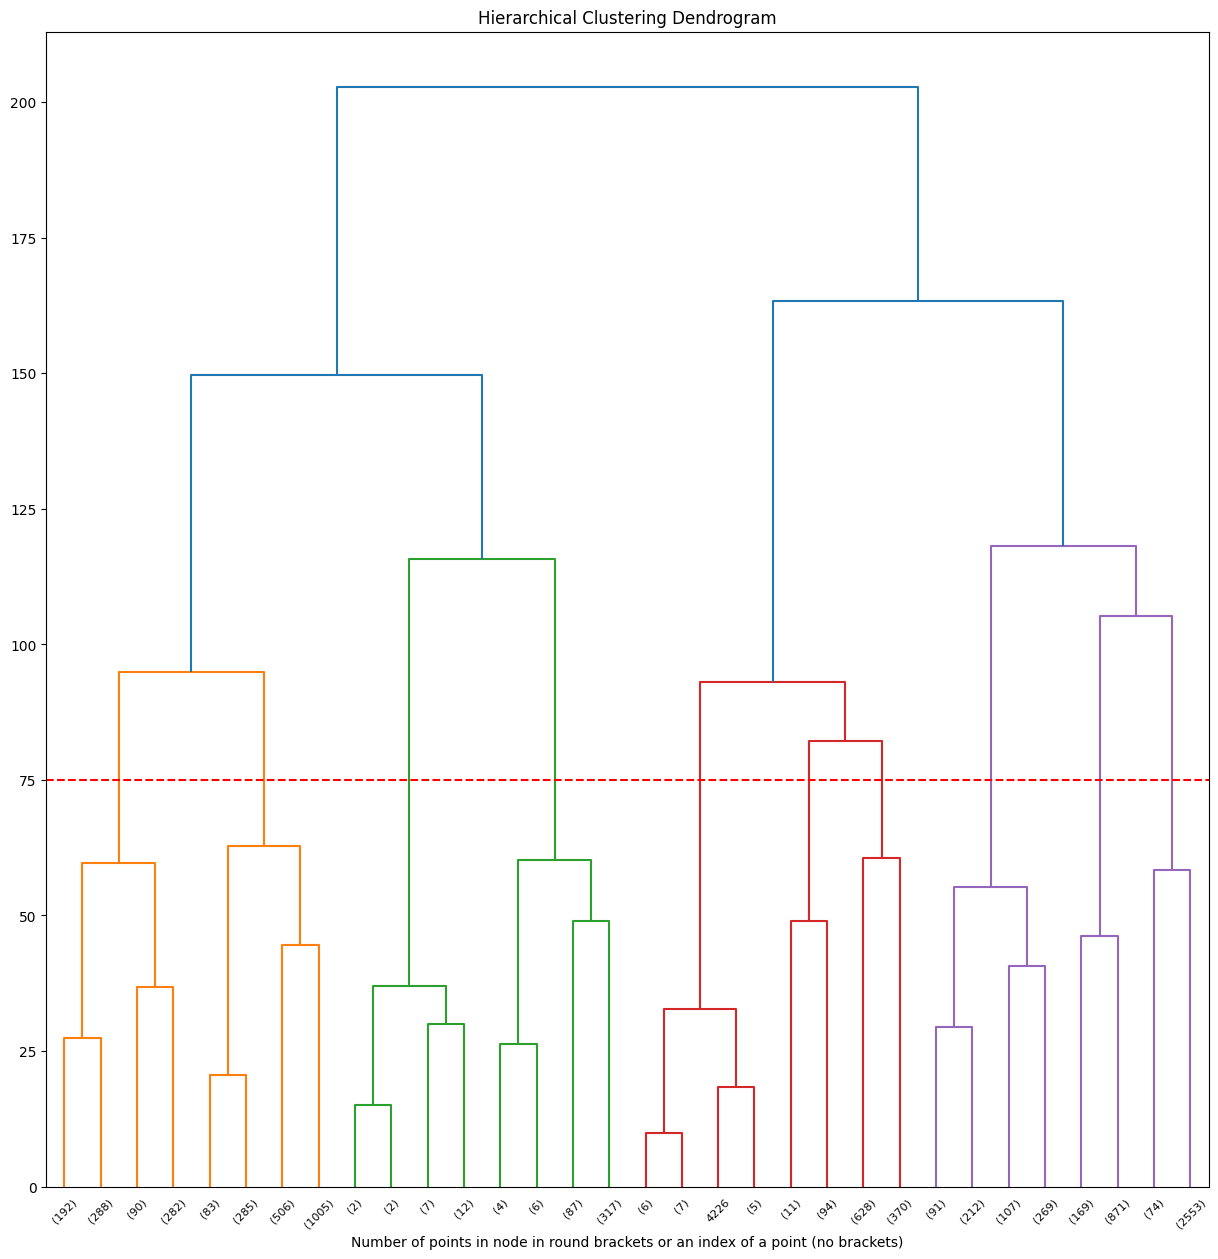

In [25]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(X_standardized)

plt.figure(figsize=(15,15))
plt.title("Hierarchical Clustering Dendrogram") 
plot_dendrogram(model, truncate_mode="level", p=4)# plot the top three levels of the dendrogram
plt.hlines(75, 0, 400, colors='r', linestyles='dashed')
plt.xlabel("Number of points in node in round brackets or an index of a point (no brackets)")
plt.show()

# Visualization

To visualize our multi-dimensional data we will apply two differen dimensionality techniques: PCA and tSNE ("tea-sni")

# 8. Select all true statements about PCA

1. PCA (Principal Component Analysis) is a machine learning algorithm used for classification tasks.

2. **PCA linearly combines the original features to construct new, principal components.**

3. **PCA is an unsupervised algorithm mainly used for dimensionality reduction in data.**

4. PCA can handle missing data without any preprocessing.

5. PCA adds extra dimensions to the data to make it easier to process.

6. **Explained variance refers to the proportion of the dataset's total variance that is accounted for by each component.**

7. Explained variance implies that higher values always lead to better model performance. 

# Run PCA with 2 components

Unlike kmeans and hierarchical clustering PCA only requires data centering (without data scaling)

In [26]:
X_mean = df - df.mean(axis=0)

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(5)
X_pca2 = pca.fit_transform(X_mean)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.47493166 0.17814415 0.1401677  0.1146871  0.04723626]
0.9551668717749474


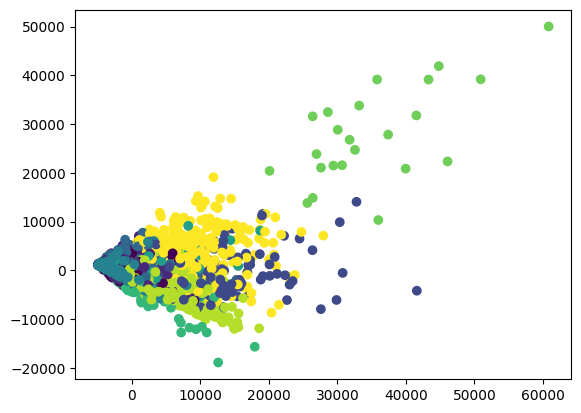

In [29]:
kmeans = KMeans(n_clusters=10, n_init='auto')
labels = kmeans.fit_predict(X_standardized)


plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels); # Use kmeans labels for the color

PCA visualizations are not always informative, we will try using TSNE, but first we need to select the optimal number of PCA components

# 9. Select number of PCA components

based on explained variance ratio. Which minimal number of PCA components explain atleast 95% of the data variance (`X_mean`)?

- 2
- **5**
- 10
- 12

# These are the `loadings` of the very first Principle component, which explains about 47% of data variance


In [30]:
components = dict(zip(df.columns, pca.components_[0]))
components = sorted(components.items(), key=lambda x: x[1], reverse=True)

for c, w in components:
    print(c, np.round(w, 3))

CREDIT_LIMIT 0.687
PAYMENTS 0.488
PURCHASES 0.295
BALANCE 0.291
CASH_ADVANCE 0.217
ONEOFF_PURCHASES 0.213
MINIMUM_PAYMENTS 0.136
INSTALLMENTS_PURCHASES 0.082
PURCHASES_TRX 0.002
CASH_ADVANCE_TRX 0.0
TENURE 0.0
ONEOFF_PURCHASES_FREQUENCY 0.0
PURCHASES_FREQUENCY 0.0
CASH_ADVANCE_FREQUENCY 0.0
PURCHASES_INSTALLMENTS_FREQUENCY 0.0
BALANCE_FREQUENCY 0.0
PRC_FULL_PAYMENT 0.0


# 10. Select all correct statements

based on the whole PCA analysis

1. **The first principal component explains roughly 47.5% of the variance, which is the largest portion. This means that this component captures the most significant patterns and structures in the data.**

2. **Examining the weights (also known as 'loadings') of the variables on this first principal component, it's apparent that 'CREDIT_LIMIT', 'PAYMENTS', and 'PURCHASES' are the features most strongly associated with this component. They have the highest weights: 0.687, 0.488, and 0.295 respectively. These high weights suggest that the first principal component might represent a sort of 'financial activity' dimension - with 'CREDIT_LIMIT' perhaps relating to the customer's creditworthiness, 'PAYMENTS' reflecting the customer's payment behavior, and 'PURCHASES' indicating the customer's purchasing behavior.**

3. **Features like 'CASH_ADVANCE_TRX', 'TENURE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'BALANCE_FREQUENCY', and 'PRC_FULL_PAYMENT' have a zero weight in the first component, meaning they do not influence this component.**

4. The first principal component, which explains approximately 47.5% of the variance, represents the least significant patterns in the data.

5. Since 'CASH_ADVANCE_TRX', 'TENURE', 'ONEOFF_PURCHASES_FREQUENCY', and other features have a weight of zero in the first component, they are the most important features for this component.

6. The weights in the principal component signify the importance of the variables in predicting the cluster labels.

7. The explained variances suggest that only the first component should be used for further analysis, as it explains the majority of the variance in the data.

8. The weights of the first principal component indicate that 'CREDIT_LIMIT', 'PAYMENTS', and 'PURCHASES' are negatively correlated with this component.

# TSNE visualization

# 11. What is t-SNE?

1. **t-SNE (t-Distributed Stochastic Neighbor Embedding) is a technique for dimensionality reduction that is particularly well-suited for the visualization of high-dimensional datasets.**

2. t-SNE (t-Distributed Stochastic Neighbor Embedding) is an optimization algorithm used to find the best parameters that minimize a convex cost function.

3. t-SNE (t-Distributed Stochastic Neighbor Embedding) is a non-linear method used for handling missing data in a given dataset.

4. t-SNE (t-Distributed Stochastic Neighbor Embedding) is an non-linear algorithm used for data clustering. It is based on the the local neighborhood of the points randomly (hence stochastic) selected from the data to generate clusters.

In [31]:
# !pip install opentsne

In [32]:
from openTSNE import TSNE

pca = PCA(10)
X_pca10 = pca.fit_transform(X_mean)
embedding = TSNE().fit(X_pca10)

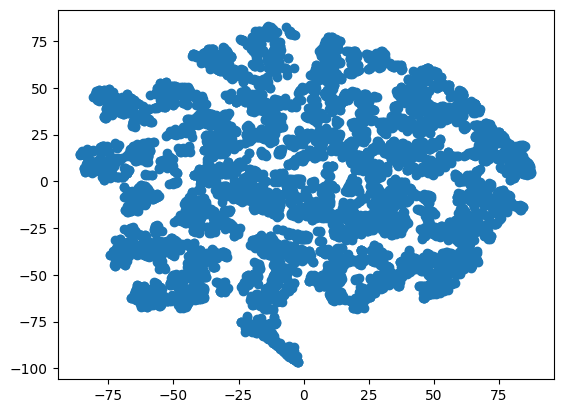

In [33]:
plt.scatter(embedding[:, 0], embedding[:, 1]);

In [34]:
ac = AgglomerativeClustering(n_clusters=8, linkage='ward')
prediction = ac.fit_predict(X_pca10)
np.unique(prediction, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([  93, 2336,  795,  165, 4504,   23,  673,   47]))

### tSNE with AgglomerativeClustering labels

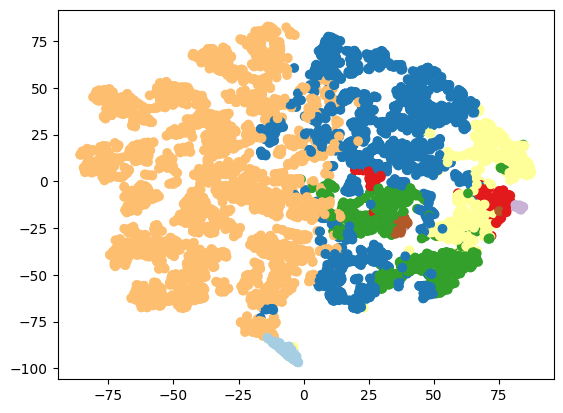

In [35]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=prediction, cmap='Paired');

### tSNE with KMeans clustering labels

In [36]:
kmeans = KMeans(n_clusters=8, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

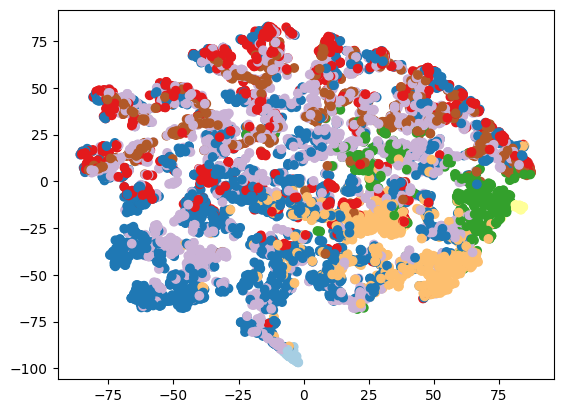

In [37]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Paired');

# 12. Which metrics are suitable for clusterings comparison?

- **adjusted rand index**
- **normalized mutual information**
- **adjusted mutual information**
- normalized accuracy score
- accuracy score
- **jaccard score**
- normalized discounted cumulative gain


Jaccard score could be used to compare different partitioning, but requires additional adaptation. Selecting or not selecting Jaccard score was not considered as an error.

# 13. Compare Kmeans and Agglomerative clusterings

with 8 clusters using Adjusted Rand Score, what is the value of ARI?

- between -0.2 and 0.2
- between 0.2 and 0.4
- **between 0.4 and 0.7**
- between 0.7 and 1

In [38]:
adjusted_rand_score(prediction, labels)

0.12812223544430237

Visually KMeans and Agglomerative (with Ward distance) result in drastically different results, we will try to remove data outliers and see if it will affect the results

# Remove outliers

In [39]:
def detect_outliers_very_simple(x, col):
    """A naive outliers detector, based on left most (5 percentile) or right most (95 percentile) threshold"""
    if col in ['BALANCE_FREQUENCY', 'TENURE']:
        return x < x.quantile(0.05)
    else:
        return x > x.quantile(0.95)

In [40]:
columns = df.columns

In [41]:
columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [42]:
cols_outliers = dict()
outliers = [False] * df.shape[0]

for col in columns:
    cols_outliers[col] = detect_outliers_very_simple(df[col], col)
    outliers += cols_outliers[col]
    print(col, np.round(cols_outliers[col].sum() / df.shape[0] * 100), '%')

BALANCE 5.0 %
BALANCE_FREQUENCY 4.0 %
PURCHASES 5.0 %
ONEOFF_PURCHASES 5.0 %
INSTALLMENTS_PURCHASES 5.0 %
CASH_ADVANCE 5.0 %
PURCHASES_FREQUENCY 0.0 %
ONEOFF_PURCHASES_FREQUENCY 0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY 0.0 %
CASH_ADVANCE_FREQUENCY 4.0 %
CASH_ADVANCE_TRX 5.0 %
PURCHASES_TRX 5.0 %
CREDIT_LIMIT 4.0 %
PAYMENTS 5.0 %
MINIMUM_PAYMENTS 5.0 %
PRC_FULL_PAYMENT 0.0 %
TENURE 4.0 %


In [43]:
X_mean['is_outlier'] = outliers

# 14. What is the percentage of detected outliers (to the whole data)?

- **32%**
- 47%
- 68%
- 61%

# 15. Repeat the analysis on filtered data

Run:
1. PCA with 10 components
2. KMeans with 12 clusters (using PCA representation), set `n_init='auto'`
3. Hierarchical clustering with 12 clusters (using PCA representation)
4. Compare 2 and 3 using adjusted mutual information

what is the value of AMI?

- between -0.2 and 0.2
- between 0.2 and 0.5
- **between 0.5 and 0.8**
- between 0.8 and 1

In [44]:
X_mean_filtered = X_mean.query('is_outlier==False')

In [50]:
pca = PCA(10)
X_pca10 = pca.fit_transform(X_mean_filtered)
embedding = TSNE().fit(X_pca10)

In [51]:
ac = AgglomerativeClustering(n_clusters=12, linkage='ward')
prediction = ac.fit_predict(X_pca10)

kmeans = KMeans(12, n_init='auto')
prediction_kmeans = kmeans.fit_predict(X_pca10)

In [52]:
from sklearn.metrics import adjusted_mutual_info_score

In [53]:
adjusted_mutual_info_score(prediction, prediction_kmeans)

0.647789684552512

# 16. Plot a subplot with points colored according to kmeans and agglomerative clustering

Draw a 1 row 2 columns subplot using TSNE embeddings. Title each subplot according to the source of clusters' colors (kmeans or agglomerative). Save pdf and upload it to the submission form.

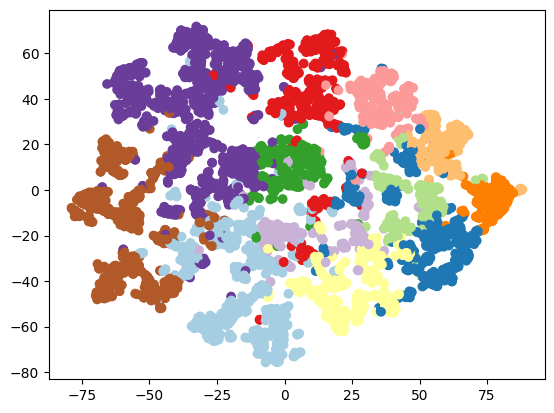

In [54]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=prediction, cmap='Paired')

# Plotly visualization

> ChatGPT: `How to plot an interactive scatter plot in python so I can mouse over a point to see some label, provide a code example.`

> `What if my data source is stored in pandas DataFrame?`

> `How to add a color to each point?`

finalize with some manual edits (change title, add color alpha, etc.)

## Try to mouse over the points on the graph

In [55]:
x_plot = pd.DataFrame(index=X_mean_filtered.index)
x_plot['tsne1'] = embedding[:, 0]
x_plot['tsne2'] = embedding[:, 1]
x_plot['customer_id'] = range(embedding.shape[0])
x_plot['cluster_agg'] = prediction
x_plot['cluster_kmeans'] = prediction_kmeans
x_plot = x_plot.reset_index()

In [57]:
# !pip install plotly

In [58]:
import plotly.express as px

In [59]:
fig = px.scatter(x_plot, x='tsne1', y='tsne2', color='cluster_agg', hover_data=['CUST_ID'], )

# Customize aspect
fig.update_traces(marker=dict(size=5, line=dict(width=0.5)), selector=dict(mode='markers')) 
fig.update_layout(title='TSNE plot of customers clusters', xaxis_title='x', yaxis_title='y')
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)

fig.show()


# 17. Interpret the resulting clusters

Try to interpret the resulting clusters, you can use smaller number of clusters (e.g. 4-8) and any clustering algorithm you want. Provide a short but detailed report <300 words. Save it to pdf and upload to submission form.

In [68]:
ac = AgglomerativeClustering(n_clusters=6, linkage='ward')
prediction = ac.fit_predict(X_pca10)

kmeans = KMeans(6, n_init='auto')
prediction_kmeans = kmeans.fit_predict(X_pca10)

In [69]:
x_plot = pd.DataFrame(index=X_mean_filtered.index)
x_plot['tsne1'] = embedding[:, 0]
x_plot['tsne2'] = embedding[:, 1]
x_plot['customer_id'] = range(embedding.shape[0])
x_plot['cluster_agg'] = prediction
x_plot['cluster_kmeans'] = prediction_kmeans
x_plot = x_plot.reset_index()

In [70]:
fig = px.scatter(x_plot, x='tsne1', y='tsne2', color='cluster_kmeans', hover_data=['CUST_ID'], )

# Customize aspect
fig.update_traces(marker=dict(size=5, line=dict(width=0.5)), selector=dict(mode='markers')) 
fig.update_layout(title='TSNE plot of customers clusters', xaxis_title='x', yaxis_title='y')
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)

fig.show()


In [73]:
x_plot.query('cluster_kmeans==0').CUST_ID

1       C10003
5       C10009
10      C10014
19      C10030
20      C10032
         ...  
5551    C18619
5553    C18621
5616    C18729
5751    C18928
5771    C18962
Name: CUST_ID, Length: 815, dtype: object

In [74]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00  \
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10005    817.714335           1.000000      16.00             16.00   
C10006   1809.828751           1.000000    1333.28              0.00   
...              ...                ...        ...               ...   
C19184      5.871712           0.500000      20.90             20.90   
C19186     28.493517           1.000000     291.12              0.00   
C19188     23.398673           0.833333     144.40              0.00   
C19189     13.457564           0.833333       0.00              0.00   
C19190    372.708075           0.666667    1093.25           1093.25   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
CUST_ID                                                              
C10001                    95.40      0.000000             0.166667  \
C10002                     0.00   6442.945483             0.000000   
C10003                     0.00      0.000000             1.000000   
C10005                     0.00      0.000000             0.083333   
C10006                  1333.28      0.000000             0.666667   
...                         ...           ...                  ...   
C19184                     0.00      0.000000             0.166667   
C19186                   291.12      0.000000             1.000000   
C19188                   144.40      0.000000             0.833333   
C19189                     0.00     36.558778             0.000000   
C19190                     0.00    127.040008             0.666667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
CUST_ID                                                                 
C10001                     0.000000                          0.083333  \
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10005                     0.083333                          0.000000   
C10006                     0.000000                          0.583333   
...                             ...                               ...   
C19184                     0.166667                          0.000000   
C19186                     0.000000                          0.833333   
C19188                     0.000000                          0.666667   
C19189                     0.000000                          0.000000   
C19190                     0.666667                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX   
CUST_ID                                                            
C10001                 0.000000                 0              2  \
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10005                 0.000000                 0              1   
C10006                 0.000000                 0              8   
...                         ...               ...            ...   
C19184                 0.000000                 0              1   
C19186                 0.000000                 0              6   
C19188                 0.000000                 0              5   
C19189                 0.166667                 2              0   
C19190                 0.333333                 2             23   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003